# CENSUS INCOME PROJECT

PROBLEM STATEMENT:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import joblib

In [2]:
#LOADING THE DATASET
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df #checking the dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EXPLORATORY DATA ANALYSIS(EDA)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [5]:
df.info()    #getting info of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 6 columns having int dtype and 9 columns having object dtype.

In [6]:
#Separating the object dtype columns and int64 dtype columns.

object_dtype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        object_dtype.append(x)
print(f"Columns having object as dtype are:-", object_dtype)

int_dtype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
        int_dtype.append(x)
print(f"Columns having int64 as dtype are:-", int_dtype)

Columns having object as dtype are:- ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Columns having int64 as dtype are:- ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [8]:
df.isna().sum()      #checking for null values in the dataset.

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No missing values are present in the dataset so we don't need to treat the null values.

In [9]:
print(f"rows and columns before dropping duplicates", df.shape)
df.drop_duplicates(inplace=True)
print(f"rows and columns after dropping duplicates", df.shape)

rows and columns before dropping duplicates (32560, 15)
rows and columns after dropping duplicates (32536, 15)


In [10]:
df.nunique().to_frame("Unique Values")      #looking for the unique values in the dataset.

,Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [11]:
for col in object_dtype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       41

In [12]:
df['Workclass'].replace({' ?':'Other-Working-Class'}, inplace=True)
df['Occupation'].replace({' ?':'Other-Occupation'}, inplace=True)
df['Native_country'].replace({' ?':'Others'}, inplace=True)

Succesfully replaced all the "?" data present in the columns "Workclass","Occupation" and "Native_country" with meaningful values.

# VISUALIZATION

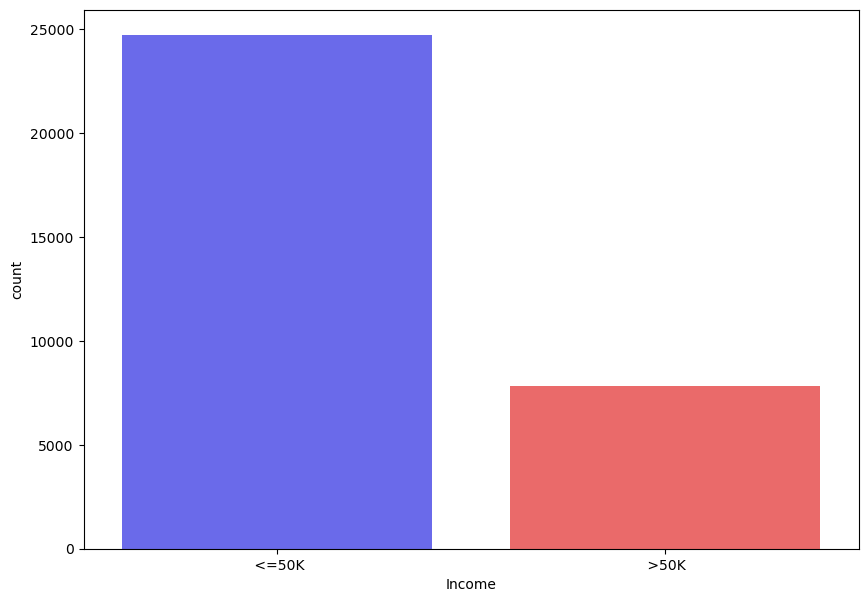

In [13]:
try:
    plt.figure(figsize=(10,7))
    col_name='Income'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name], palette="seismic")
    for i in ax.get_xtickables():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], horizontalalignment="center", fontweight='bold', color='w')
        index+=1
        
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f" Number of rows")
    plt.show()
except Exception as e:
    pass

The Income column of our dataset is imbalanced therefore needed to be treated.

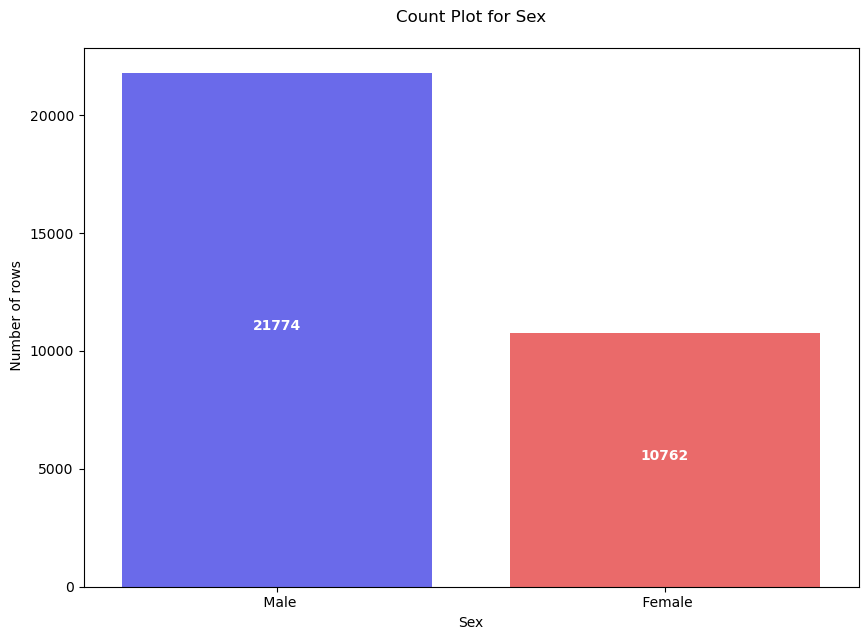

In [14]:
try:
    plt.figure(figsize=(10,7))
    col_name='Sex'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name], palette="seismic")
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], horizontalalignment="center", fontweight='bold', color='w')
        index+=1
        
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f" Number of rows")
    plt.show()
except Exception as e:
    pass

The number of data values in dataset for male is higher than that of female.

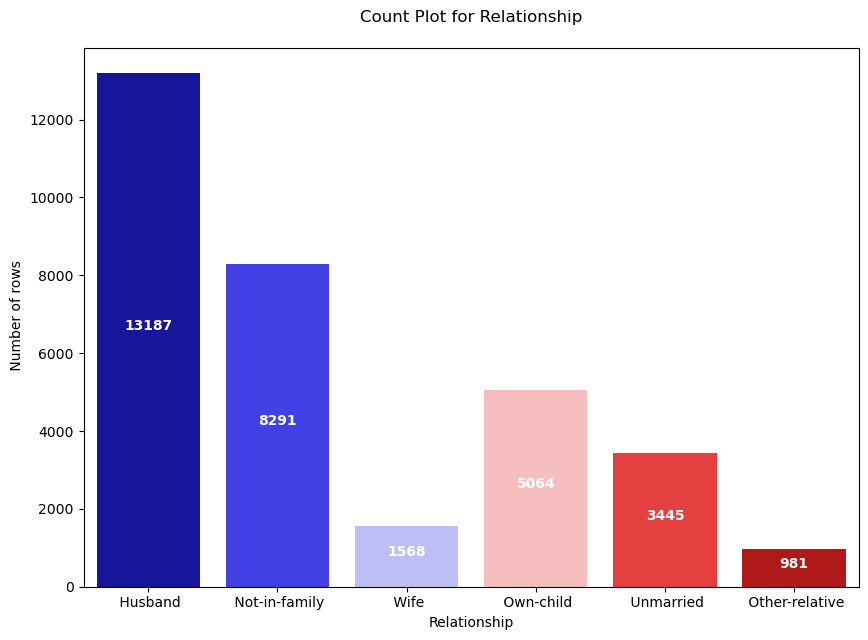

In [15]:
try:
    plt.figure(figsize=(10,7))
    col_name='Relationship'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name], palette="seismic")
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], horizontalalignment="center", fontweight='bold', color='w')
        index+=1
        
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f" Number of rows")
    plt.show()
except Exception as e:
    pass

It can be seen that the relaionship status of "Husband" is highest and the "other relative" is lowest.

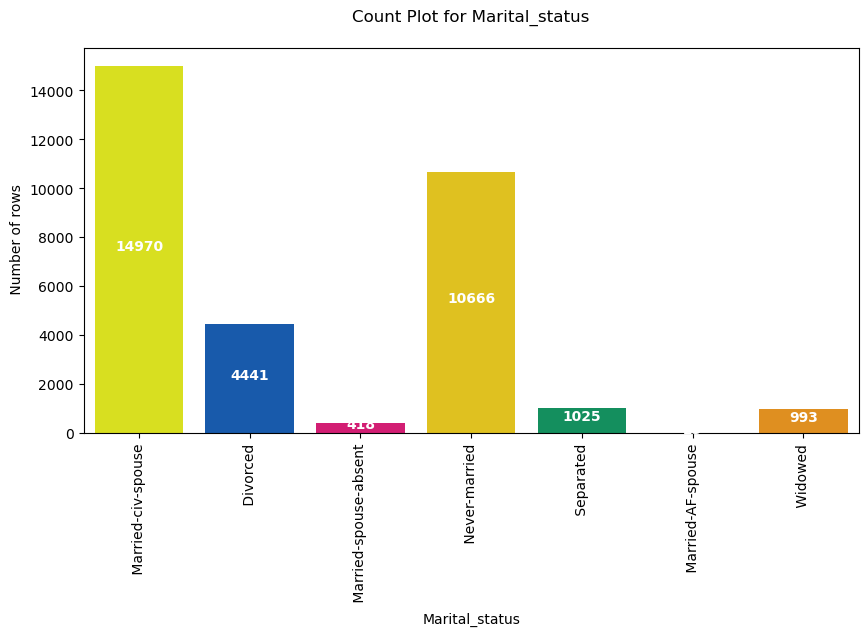

In [16]:
try:
    plt.figure(figsize=(10,5))
    col_name='Marital_status'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name], palette="prism")
  
    
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], horizontalalignment="center", fontweight='bold', color='w')
        index+=1
        
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f" Number of rows")
    plt.xticks(rotation=90)
    plt.show()
except Exception as e:
    pass

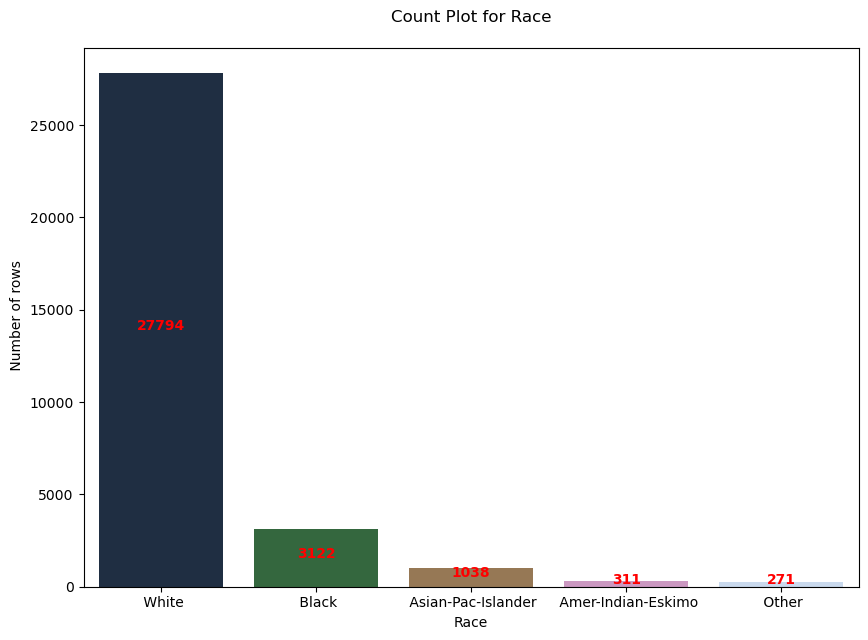

In [17]:
try:
    plt.figure(figsize=(10,7))
    col_name='Race'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name], palette="cubehelix")
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], horizontalalignment="center", fontweight='bold', color='r')
        index+=1
        
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f" Number of rows")
    plt.show()
except Exception as e:
    pass

The race column mostly comprise of white people in the dataset.

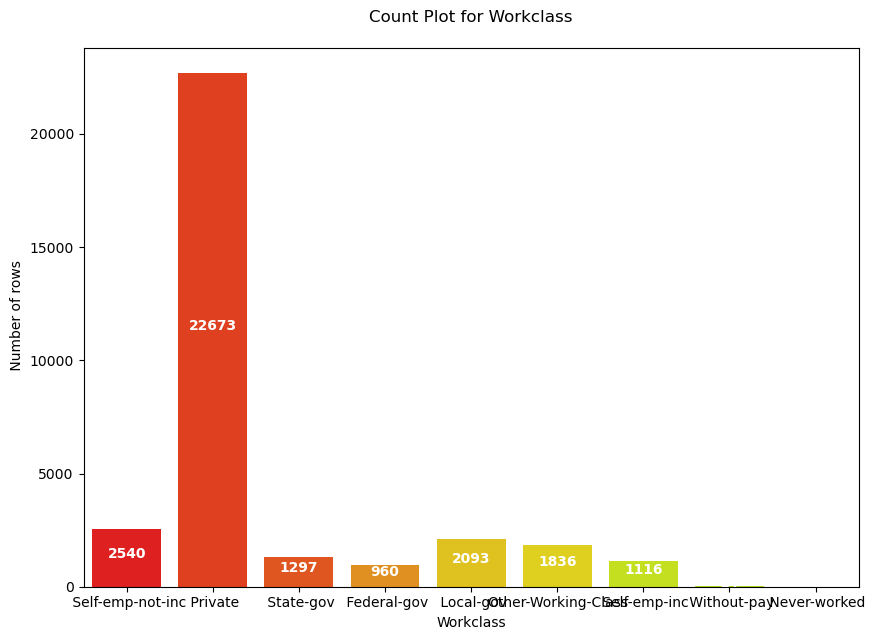

In [18]:
try:
    plt.figure(figsize=(10,7))
    col_name='Workclass'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name], palette="prism")
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], horizontalalignment="center", fontweight='bold', color='w')
        index+=1
        
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f" Number of rows")
    plt.show()
except Exception as e:
    pass

The maxmimum number of people work in the private sector as compared to any other sector.

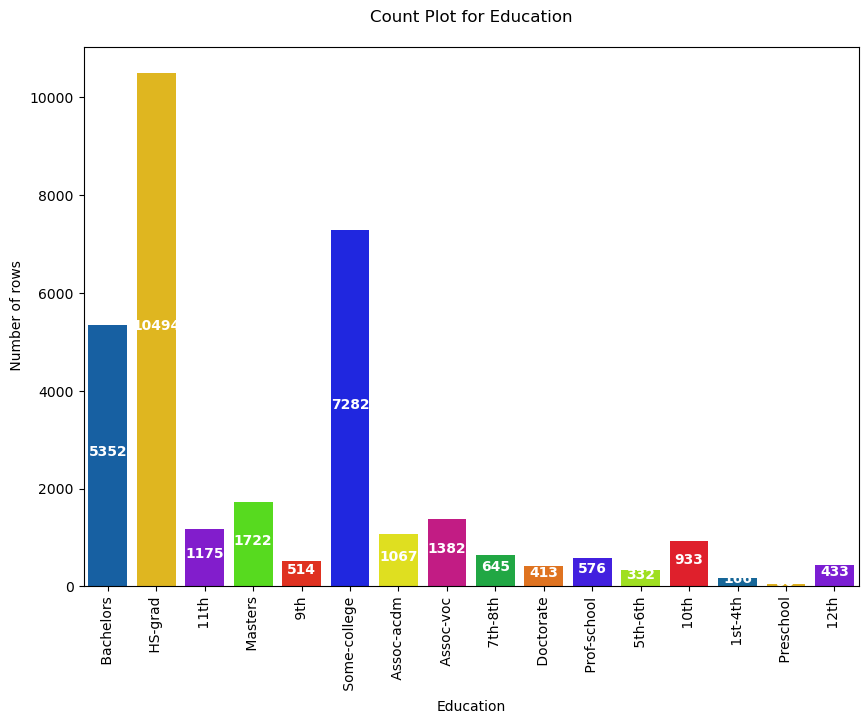

In [19]:
try:
    plt.figure(figsize=(10,7))
    col_name='Education'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name], palette="prism")
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], horizontalalignment="center", fontweight='bold', color='w')
        index+=1
        
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f" Number of rows")
    plt.xticks(rotation=90)
    plt.show()
except Exception as e:
    print("Error",e)
    pass

The education column has the highest number of values in HS grad folowwed by other college and Bachelors.

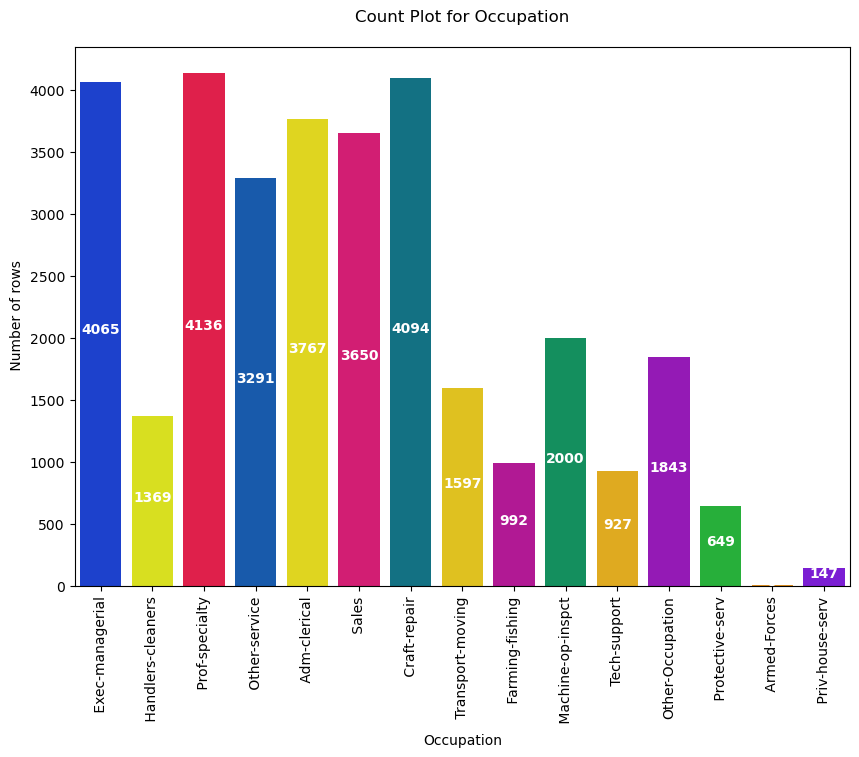

In [20]:
try:
    plt.figure(figsize=(10,7))
    col_name='Occupation'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name], palette="prism")
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], horizontalalignment="center", fontweight='bold', color='w')
        index+=1
        
    plt.title(f"Count Plot for {col_name}\n")
    plt.xticks(rotation=90)
    plt.ylabel(f" Number of rows")
    plt.show()
except Exception as e:
    print("Error",e)
    pass

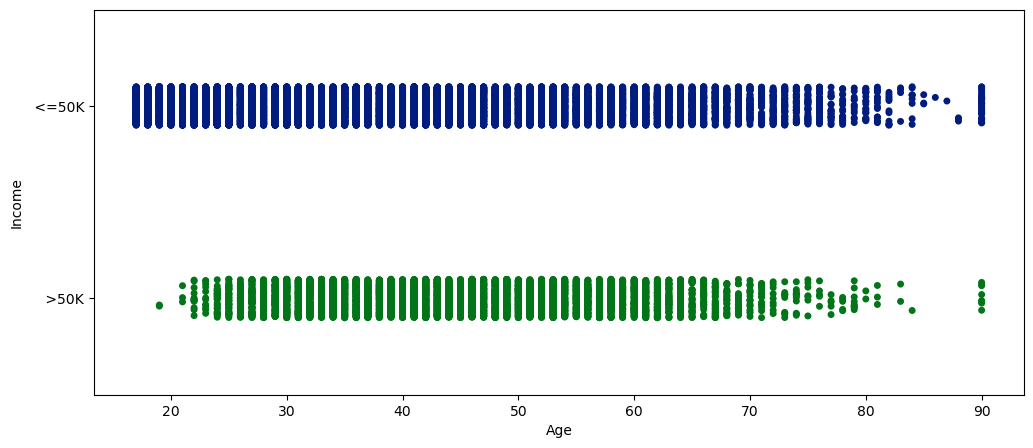

In [21]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x='Age', y='Income', data=df)
plt.show()

In the above strip plot we can see that the youngsters hardly have income more than 50K.

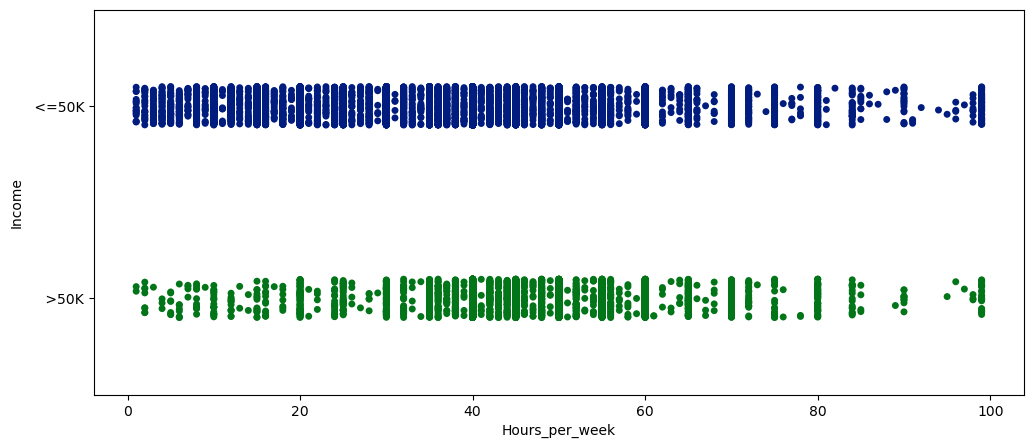

In [22]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x='Hours_per_week', y='Income', data=df)
plt.show()

It is clear from the above plot that people who have income <=50k work for more hours per week as compared to those who earn >=50k.

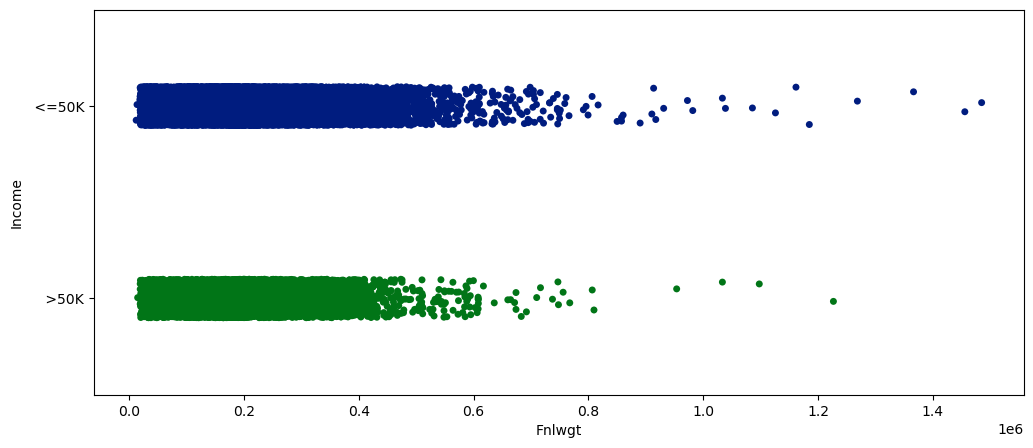

In [23]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x='Fnlwgt', y='Income', data=df)
plt.show()

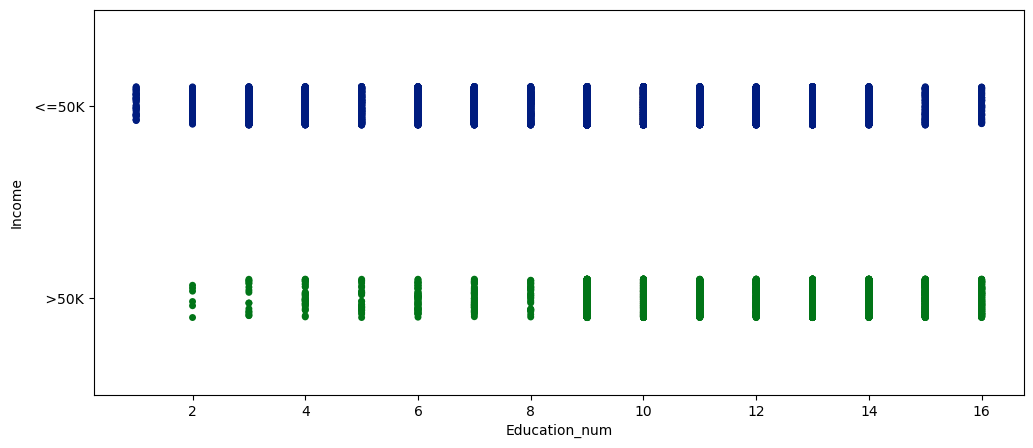

In [24]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x='Education_num', y='Income', data=df)
plt.show()

It can be seen in the above plot that lower education number is almost negligible for people with income >50k.

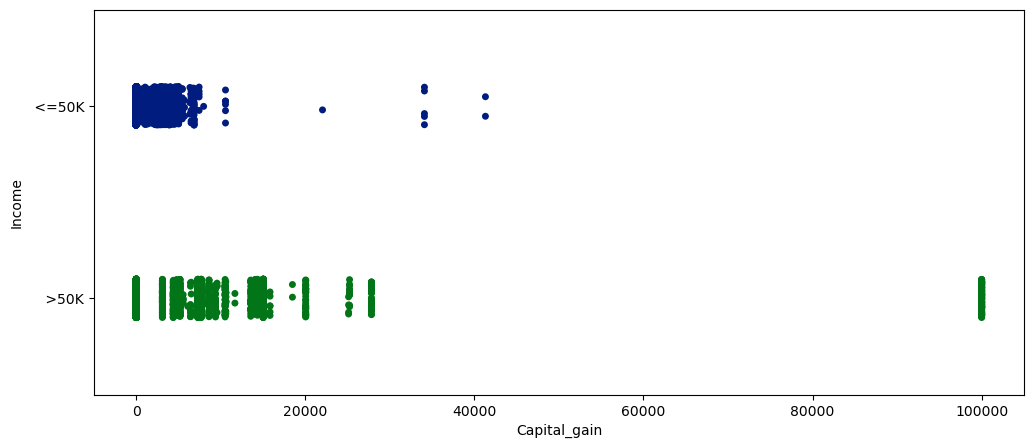

In [25]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x='Capital_gain', y='Income', data=df)
plt.show()

The capital gain for people who earn more than 50k is on a higher scale.

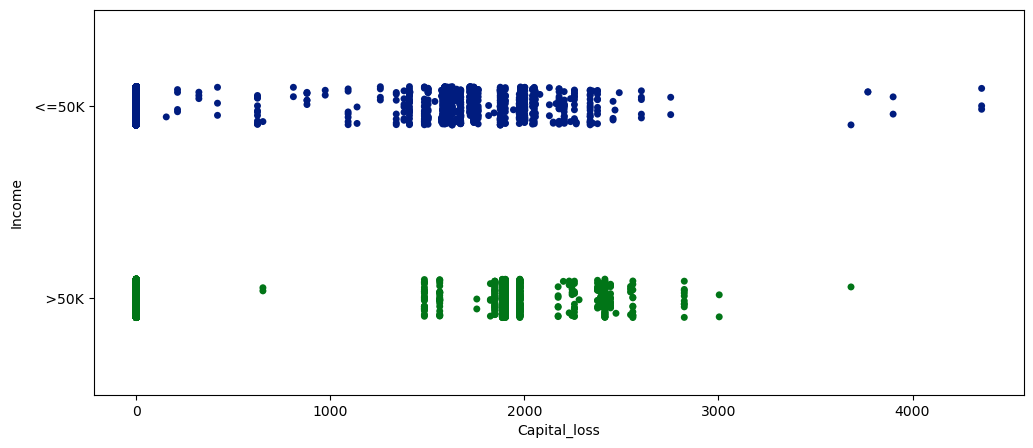

In [26]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x='Capital_loss', y='Income', data=df)
plt.show()

The capital loss for people who earn <50k is more as compared to those who earn more than 50k.

Text(0, 0.5, 'Percentage of People')

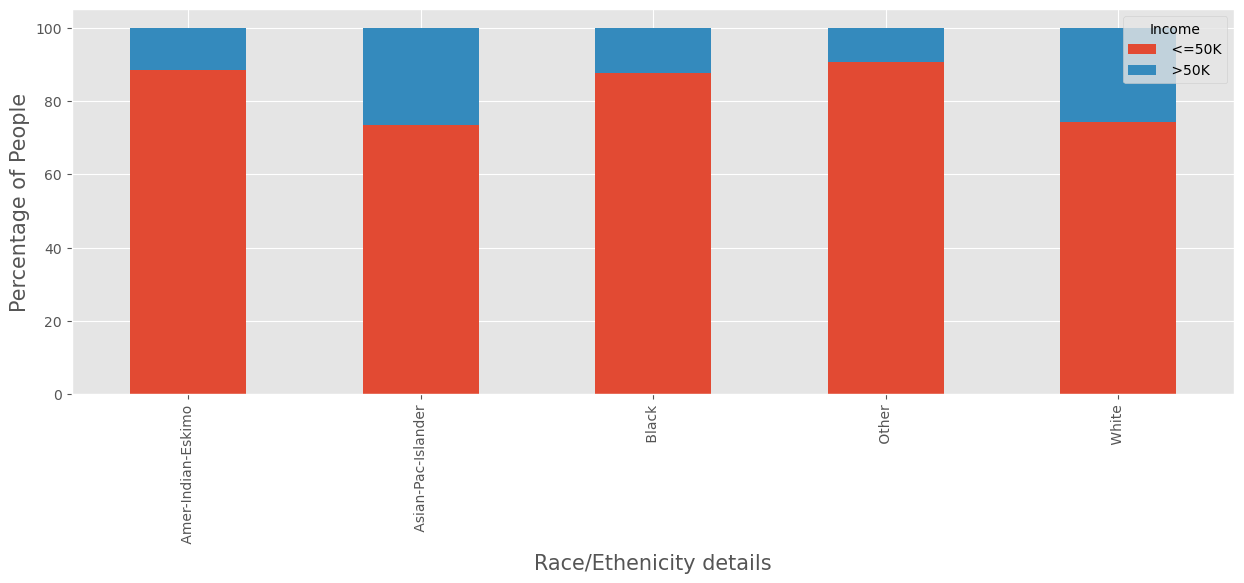

In [27]:
plt.style.use('ggplot')
tbl=pd.crosstab(df['Race'],df['Income'])
(tbl.div(tbl.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel('Race/Ethenicity details', fontsize=15)
plt.ylabel('Percentage of People', fontsize=15)

Text(0, 0.5, 'Percentage of People')

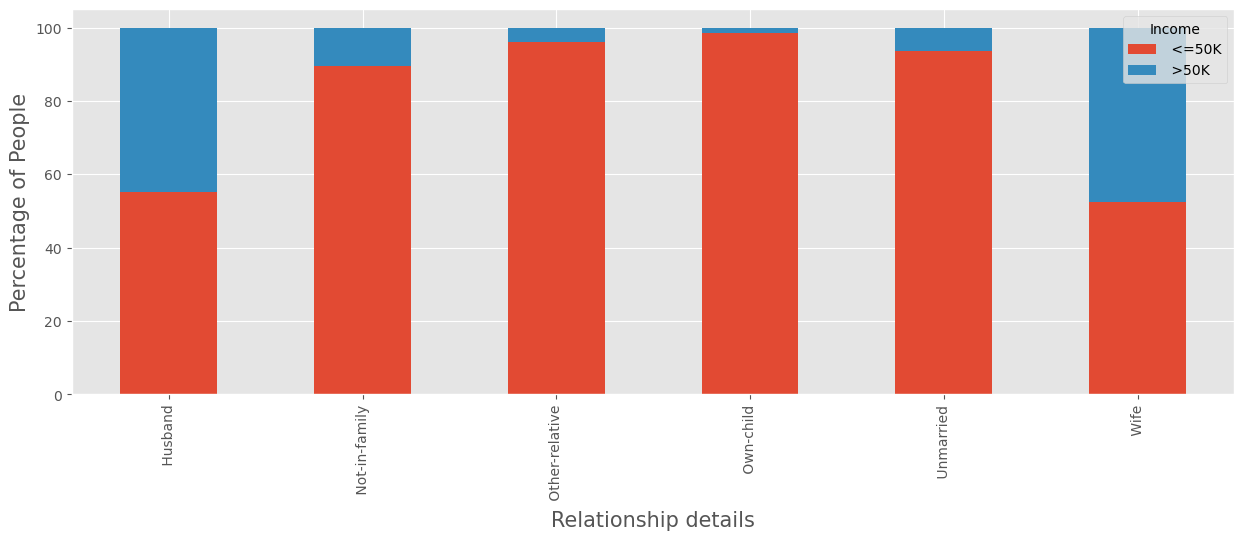

In [28]:
 plt.style.use('ggplot')
tbl=pd.crosstab(df['Relationship'],df['Income'])
(tbl.div(tbl.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel('Relationship details', fontsize=15)
plt.ylabel('Percentage of People', fontsize=15)

Text(0, 0.5, 'Percentage of People')

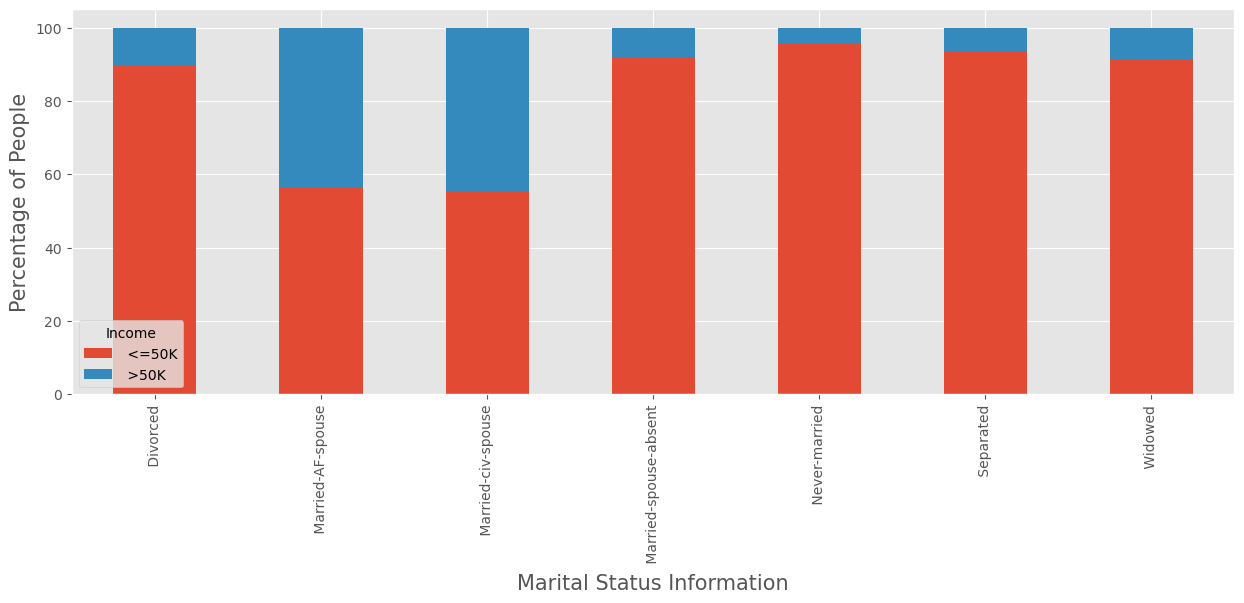

In [29]:
plt.style.use('ggplot')
tbl=pd.crosstab(df['Marital_status'],df['Income'])
(tbl.div(tbl.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel('Marital Status Information', fontsize=15)
plt.ylabel('Percentage of People', fontsize=15)

Text(0, 0.5, 'Percentage of People')

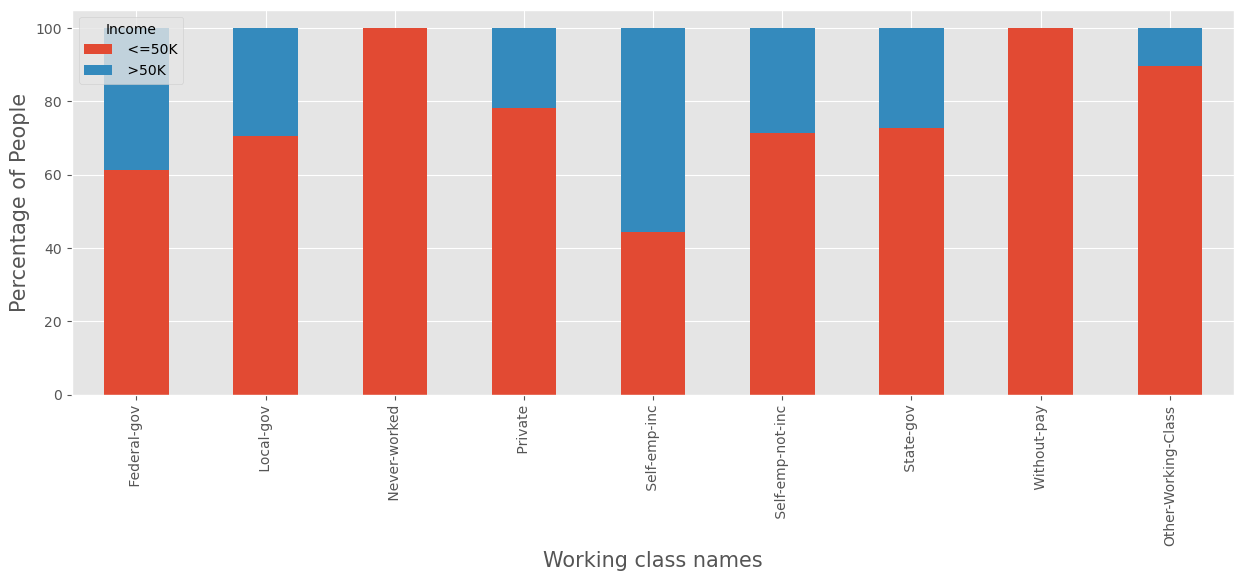

In [30]:
plt.style.use('ggplot')
tbl=pd.crosstab(df['Workclass'],df['Income'])
(tbl.div(tbl.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel('Working class names', fontsize=15)
plt.ylabel('Percentage of People', fontsize=15)

Text(0, 0.5, 'Percentage of People')

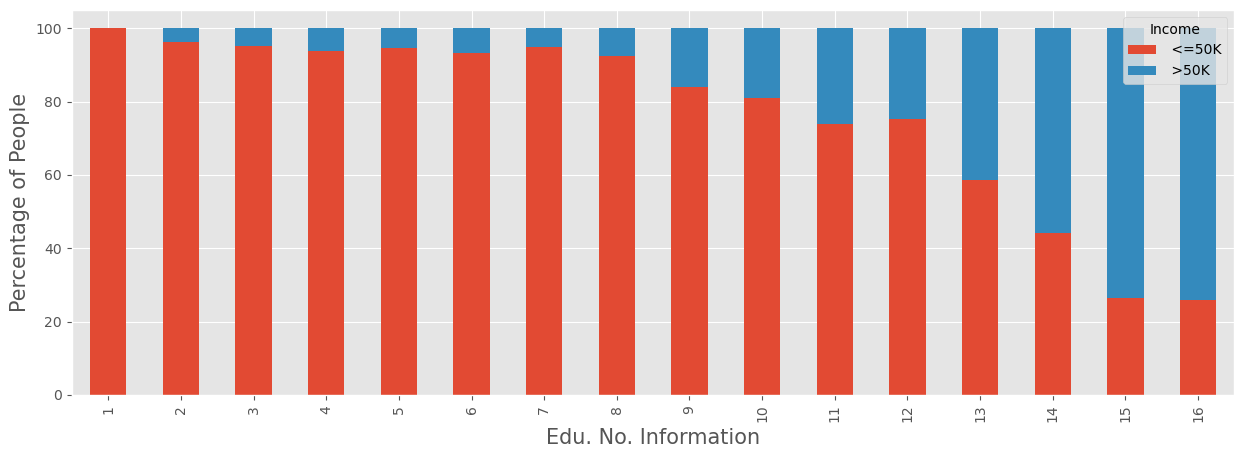

In [31]:
plt.style.use('ggplot')
tbl=pd.crosstab(df['Education_num'],df['Income'])
(tbl.div(tbl.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel('Edu. No. Information', fontsize=15)
plt.ylabel('Percentage of People', fontsize=15)

Text(0, 0.5, 'Percentage of People')

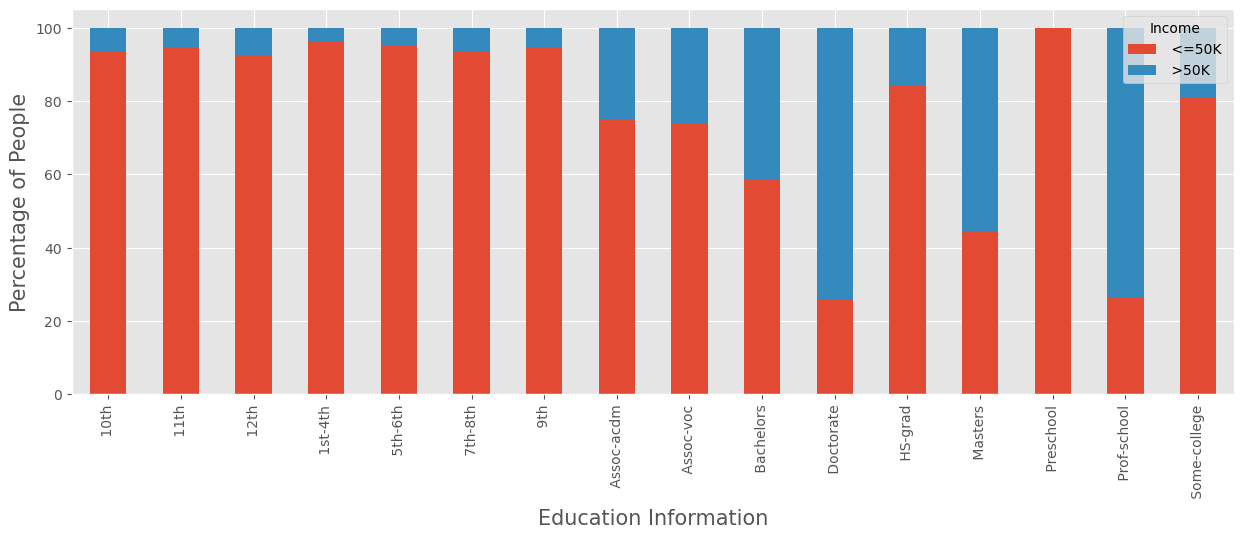

In [32]:
plt.style.use('ggplot')
tbl=pd.crosstab(df['Education'],df['Income'])
(tbl.div(tbl.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel('Education Information', fontsize=15)
plt.ylabel('Percentage of People', fontsize=15)

Text(0, 0.5, 'Percentage of People')

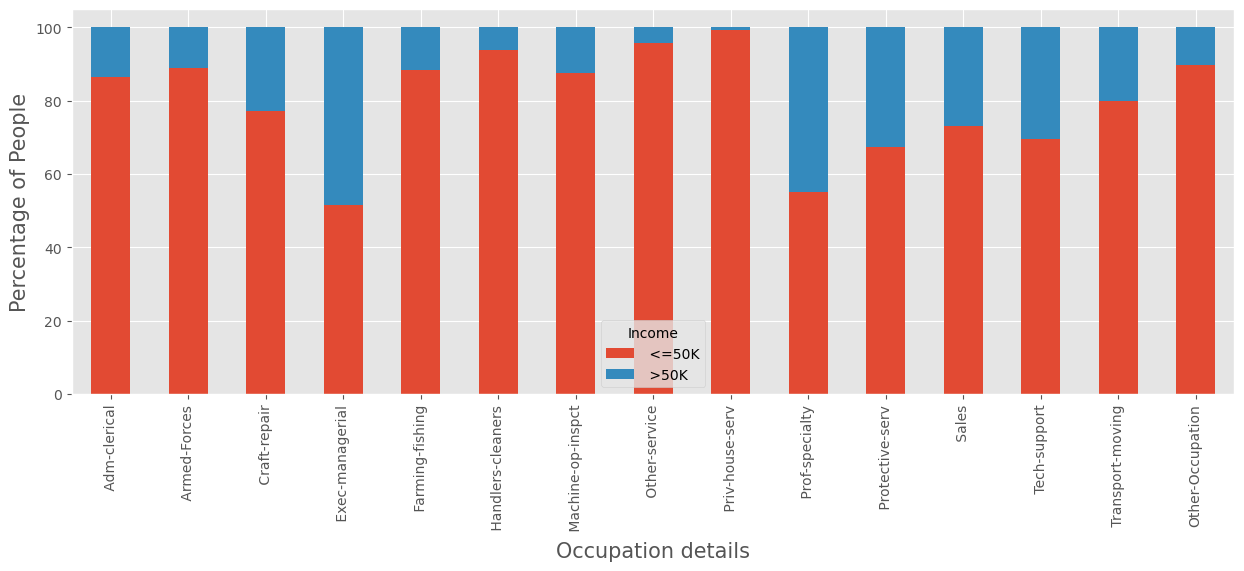

In [33]:
plt.style.use('ggplot')
tbl=pd.crosstab(df['Occupation'],df['Income'])
(tbl.div(tbl.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel('Occupation details', fontsize=15)
plt.ylabel('Percentage of People', fontsize=15)

Text(0, 0.5, 'Percentage of People')

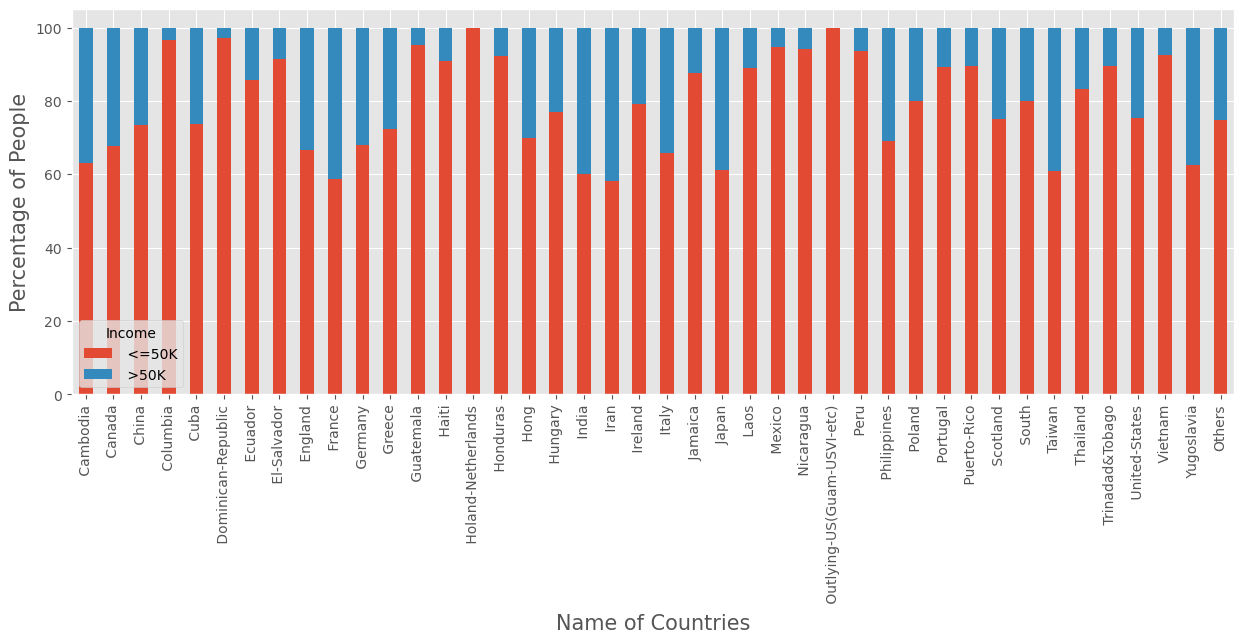

In [34]:
plt.style.use('ggplot')
tbl=pd.crosstab(df['Native_country'],df['Income'])
(tbl.div(tbl.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel('Name of Countries', fontsize=15)
plt.ylabel('Percentage of People', fontsize=15)

Text(0, 0.5, 'Percentage of People')

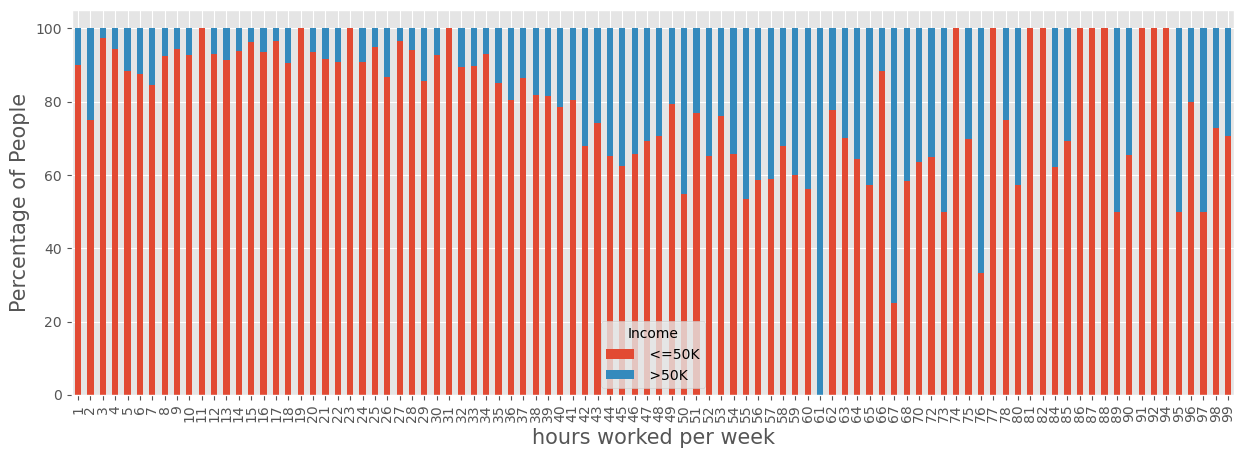

In [35]:
plt.style.use('ggplot')
tbl=pd.crosstab(df['Hours_per_week'],df['Income'])
(tbl.div(tbl.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel('hours worked per week', fontsize=15)
plt.ylabel('Percentage of People', fontsize=15)

Text(0, 0.5, 'Percentage of People')

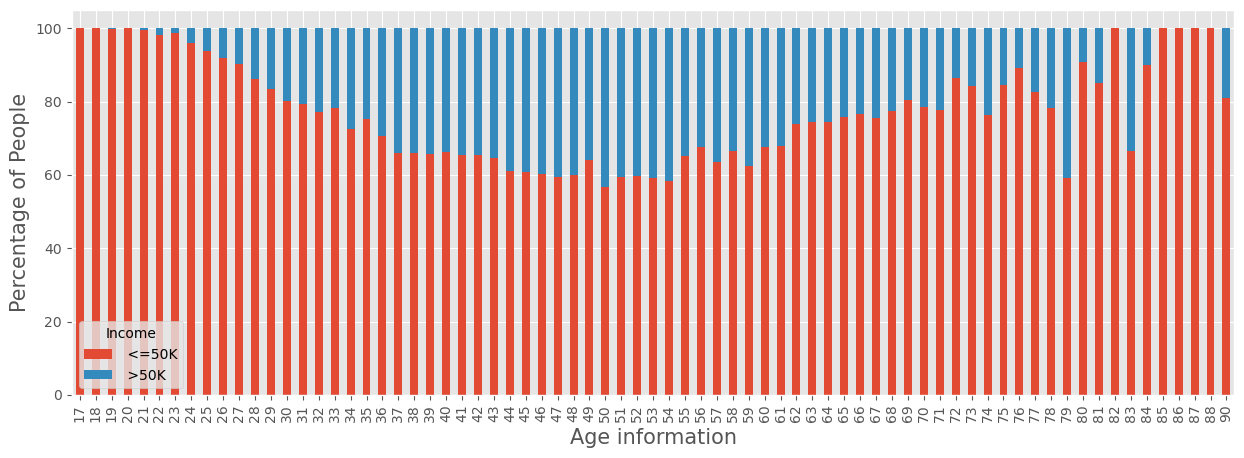

In [36]:
plt.style.use('ggplot')
tbl=pd.crosstab(df['Age'],df['Income'])
(tbl.div(tbl.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel('Age information', fontsize=15)
plt.ylabel('Percentage of People', fontsize=15)

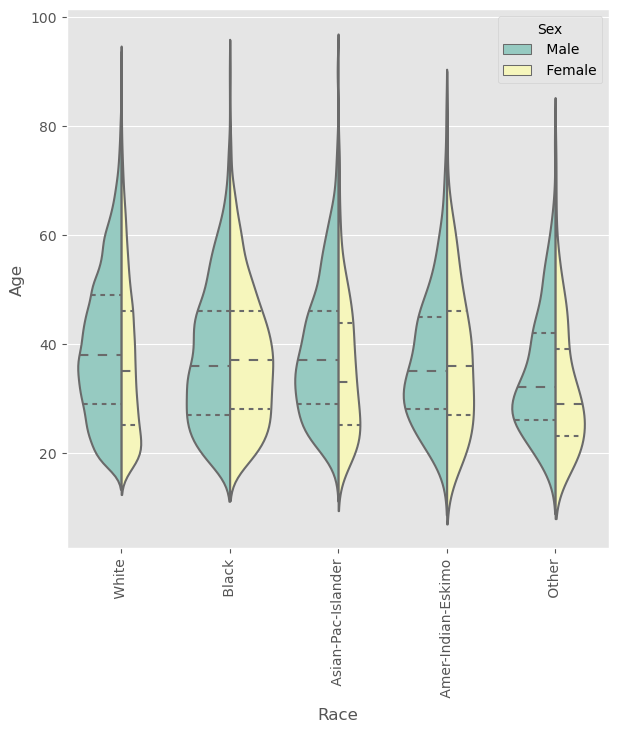

In [37]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Race',y='Age', hue='Sex', data=df, palette="Set3", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

The plot above depicts that fmale with black ethenicity of any age group is higher than females of other ethenicity.

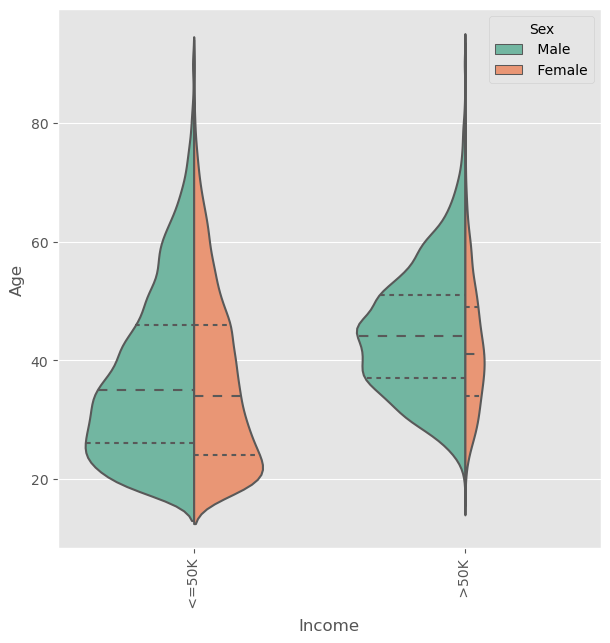

In [38]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Income',y='Age', hue='Sex', data=df, palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

The plot above shows us that male in any age and income group have a higher number than females.

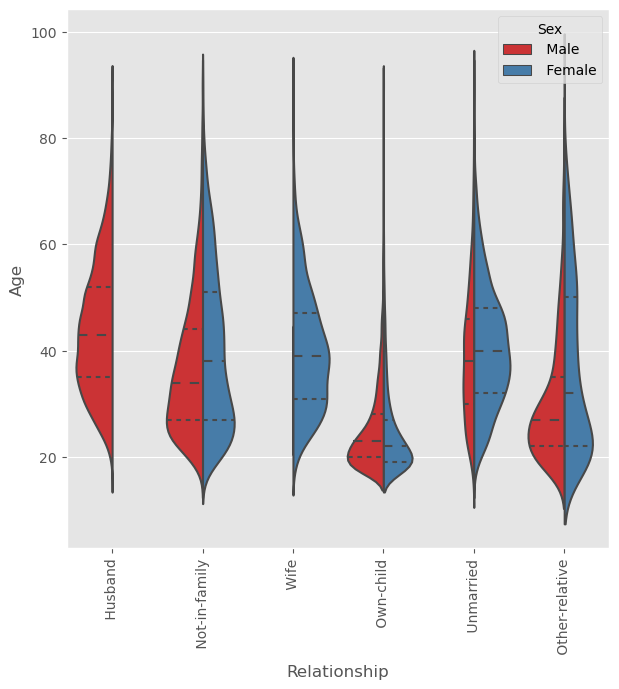

In [39]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Relationship',y='Age', hue='Sex', data=df, palette="Set1", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

The number of people in own-child relationship age from 10-40 and there is higher number of females who are unmarried.

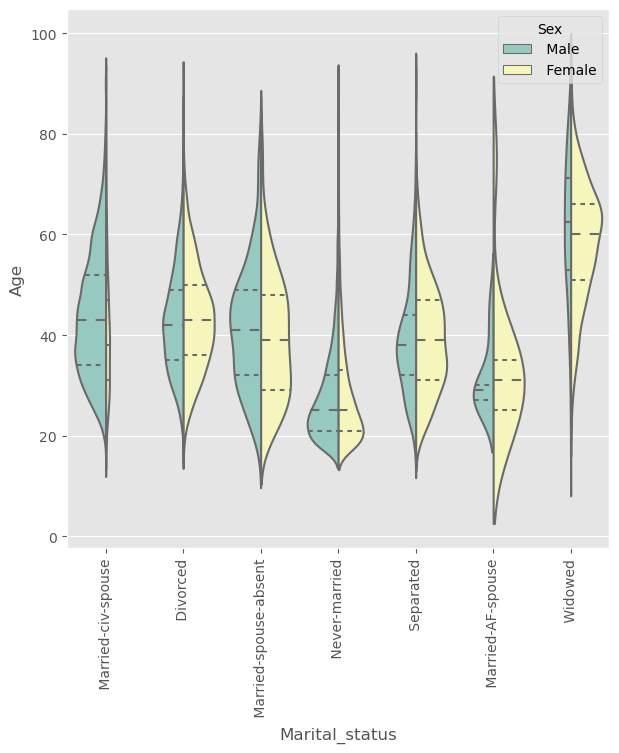

In [40]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Marital_status',y='Age', hue='Sex', data=df, palette="Set3", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

The marital status as married-af-spouse have a higher number in male than in female. There is more number of females who are widowed as compared to males.

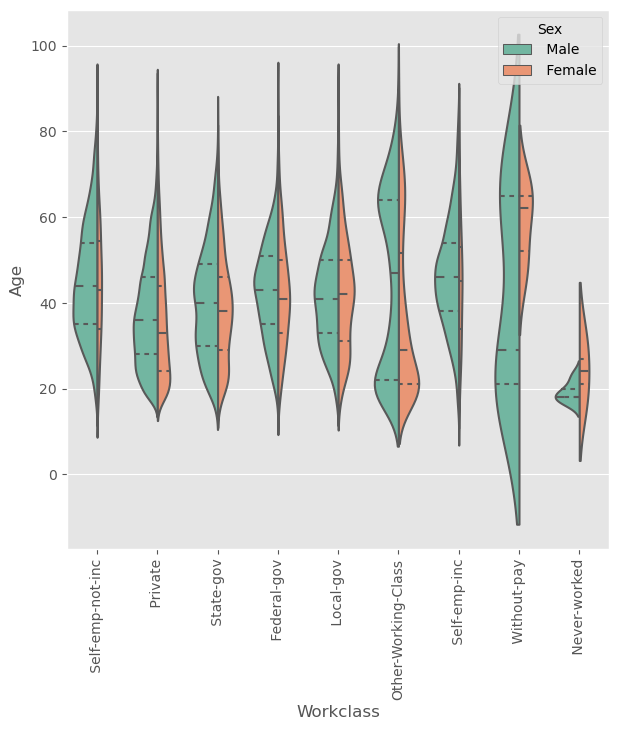

In [41]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Workclass',y='Age', hue='Sex', data=df, palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

The violin plot above shows that most of the working class sectors in each category are covered by males as compared to females.

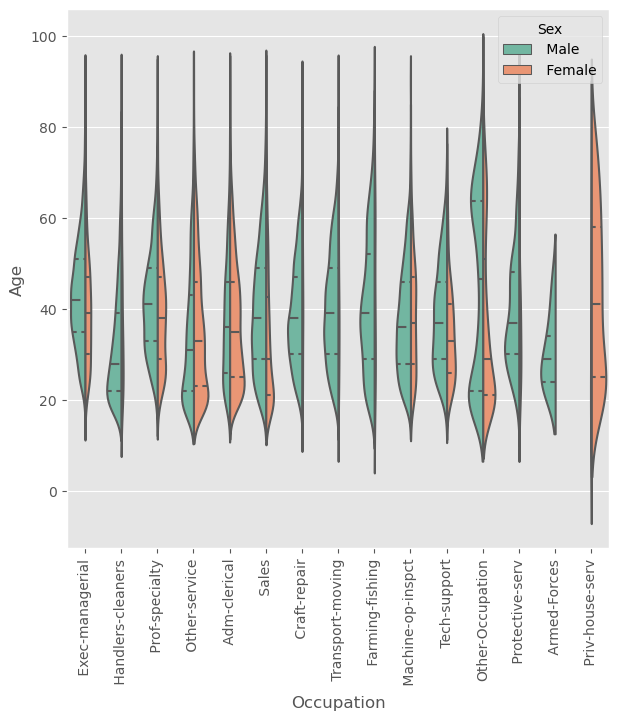

In [42]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Occupation',y='Age', hue='Sex', data=df, palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

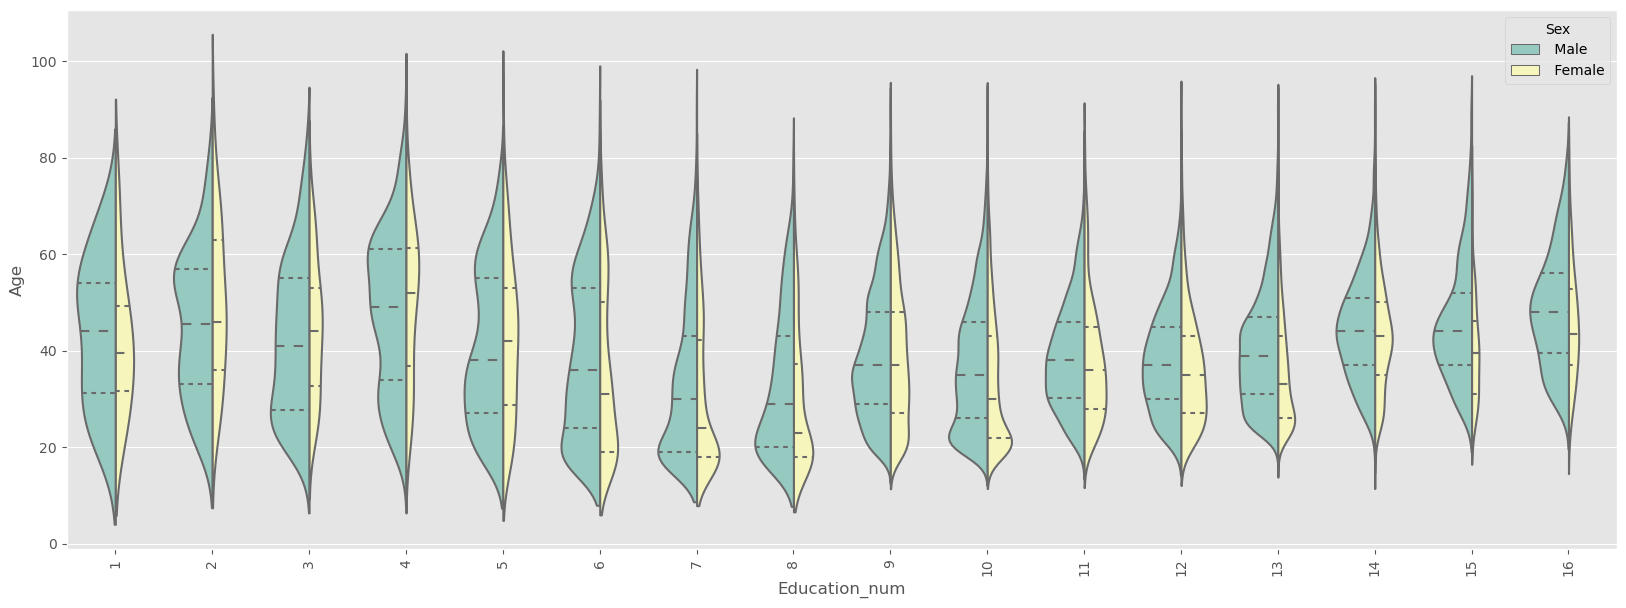

In [43]:
plt.figure(figsize=(20,7))
sns.violinplot(x='Education_num',y='Age', hue='Sex', data=df, palette="Set3", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Males in all age group have a higher education number as compared to females.

# ENCODING THE CATEGORICAL OBJECT DATATYPE COLUMNS

In [44]:
#LABEL ENCODER

le=LabelEncoder()
df["Income"]=le.fit_transform(df["Income"])
df.sample(6)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
19932,21,Private,211601,Some-college,10,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,0
30443,17,Other-Working-Class,371316,10th,6,Never-married,Other-Occupation,Own-child,White,Male,0,0,25,United-States,0
7529,23,Private,169188,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,25,United-States,0
10561,36,Private,247750,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,45,United-States,0
15964,39,Private,99357,Masters,14,Divorced,Prof-specialty,Own-child,White,Female,1506,0,40,United-States,0
23706,32,Private,113364,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,30,United-States,0


#By using Label encoder succesfully converted the object datatype in our "INCOME" column to a numerical format.

In [45]:
#ORDINAL ENCODER

oe=OrdinalEncoder()
df['Workclass']=oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education']=oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status']=oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation']=oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship']=oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Native_country']=oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Race']=oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex']=oe.fit_transform(df['Sex'].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0


In [46]:
#checking the shape of the dataset after encoding

print(f"Shape of the dataset after encoding is", df.shape)

Shape of the dataset after encoding is (32536, 15)


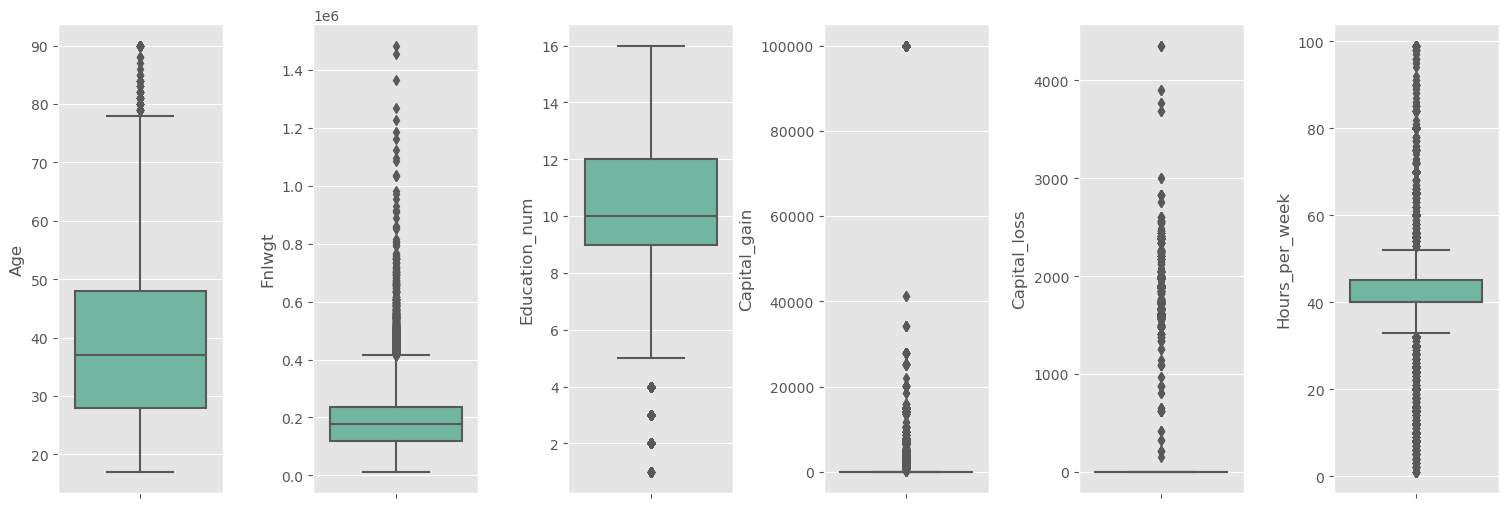

In [47]:
fig, ax=plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index=0
ax=ax.flatten()
for col, value in df[int_dtype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Outliers are present in ur numerical datat columns therefore needs to be treated.

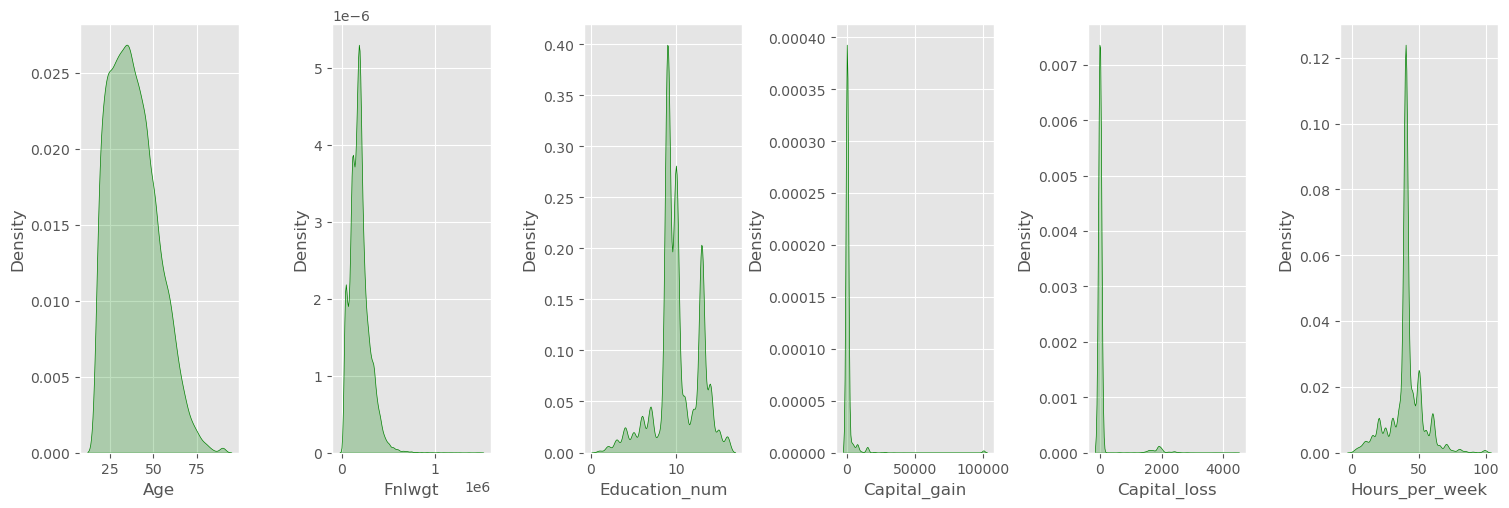

In [48]:
fig, ax=plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index=0
ax=ax.flatten()
for col, value in df[int_dtype].items():
    sns.distplot(value, ax=ax[index], hist=False, color='g', kde_kws={"shade":True})
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

By the help of distplot we can see the presence of skewness in our numerical data columns.

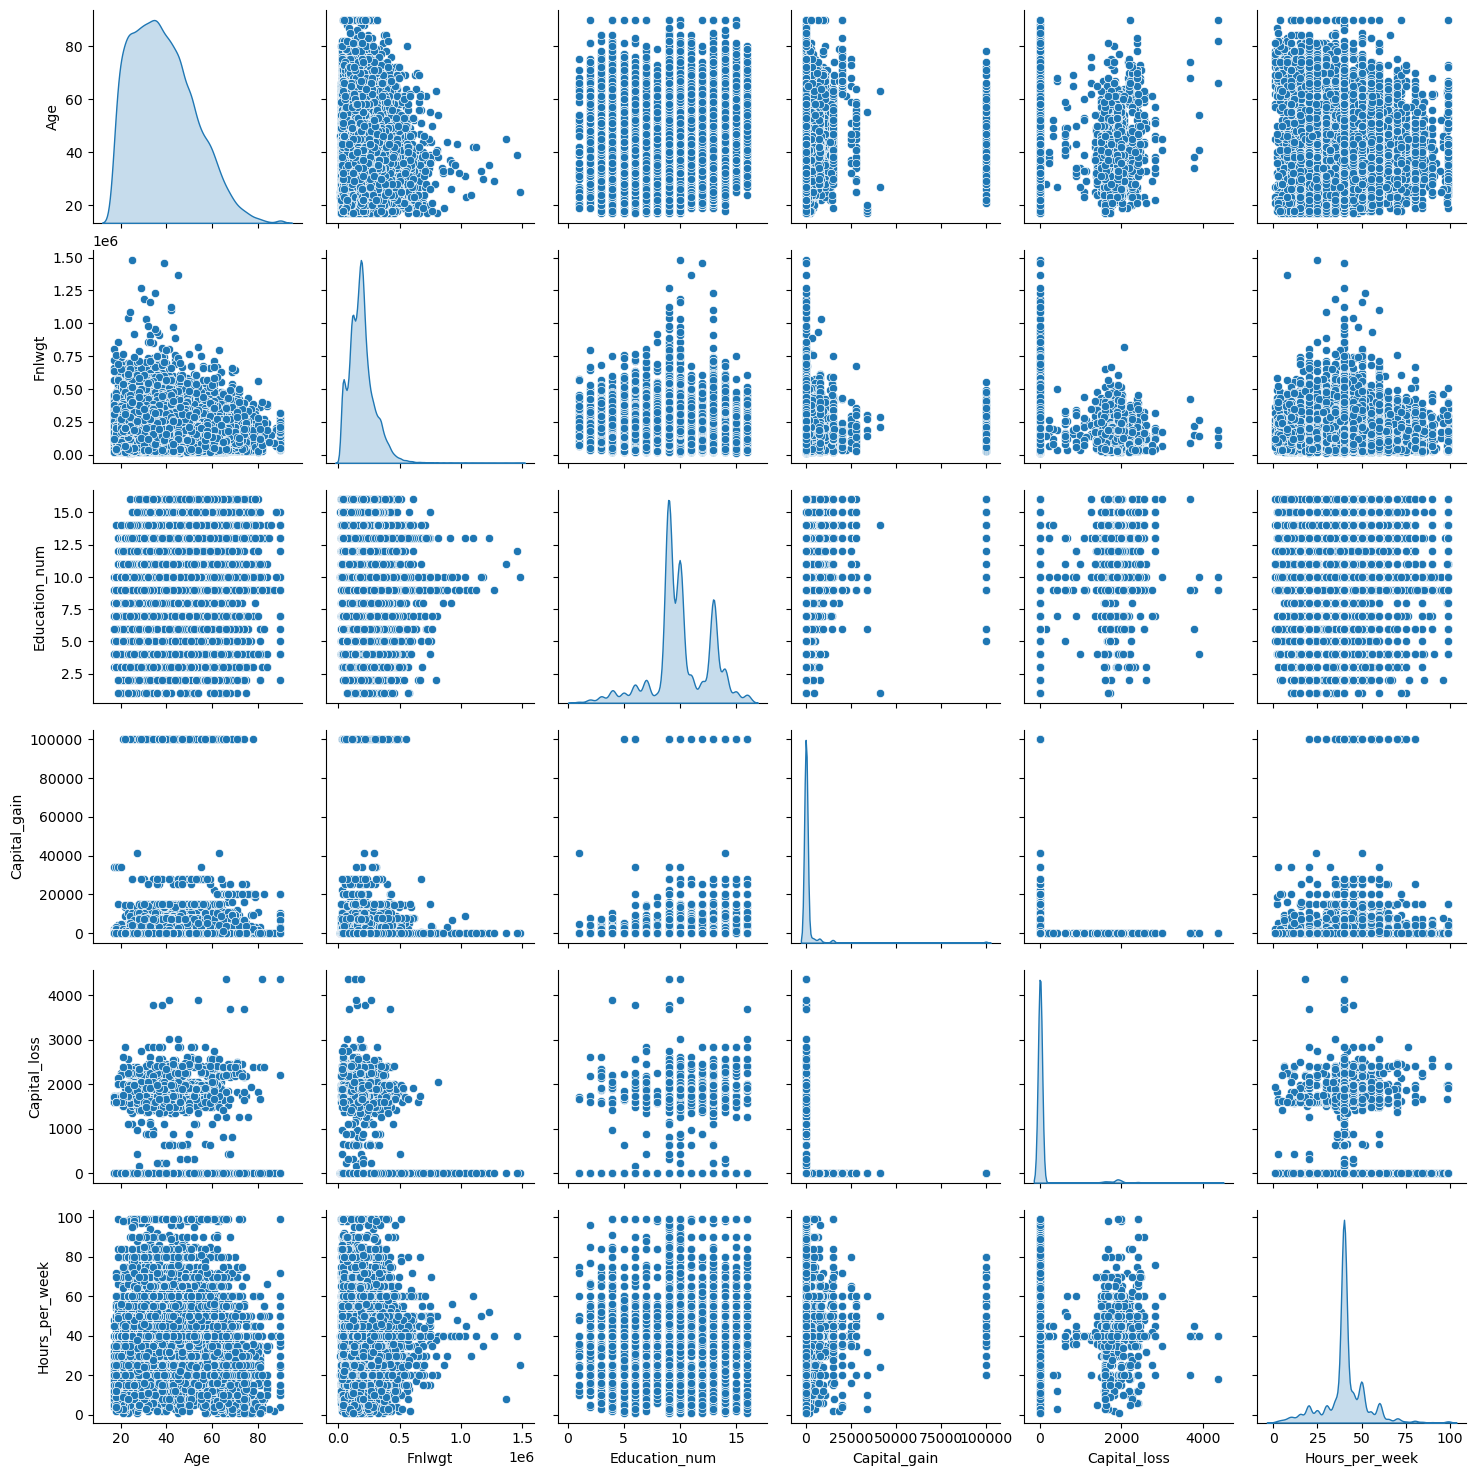

In [49]:
num_values=df.drop(['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex',
                   'Native_country','Income'], axis=1)
plt.style.use('default')
g=sns.pairplot(num_values, diag_kind="kde")
for ax in g.axes.flat:
    ax.tick_params("x")
plt.show()

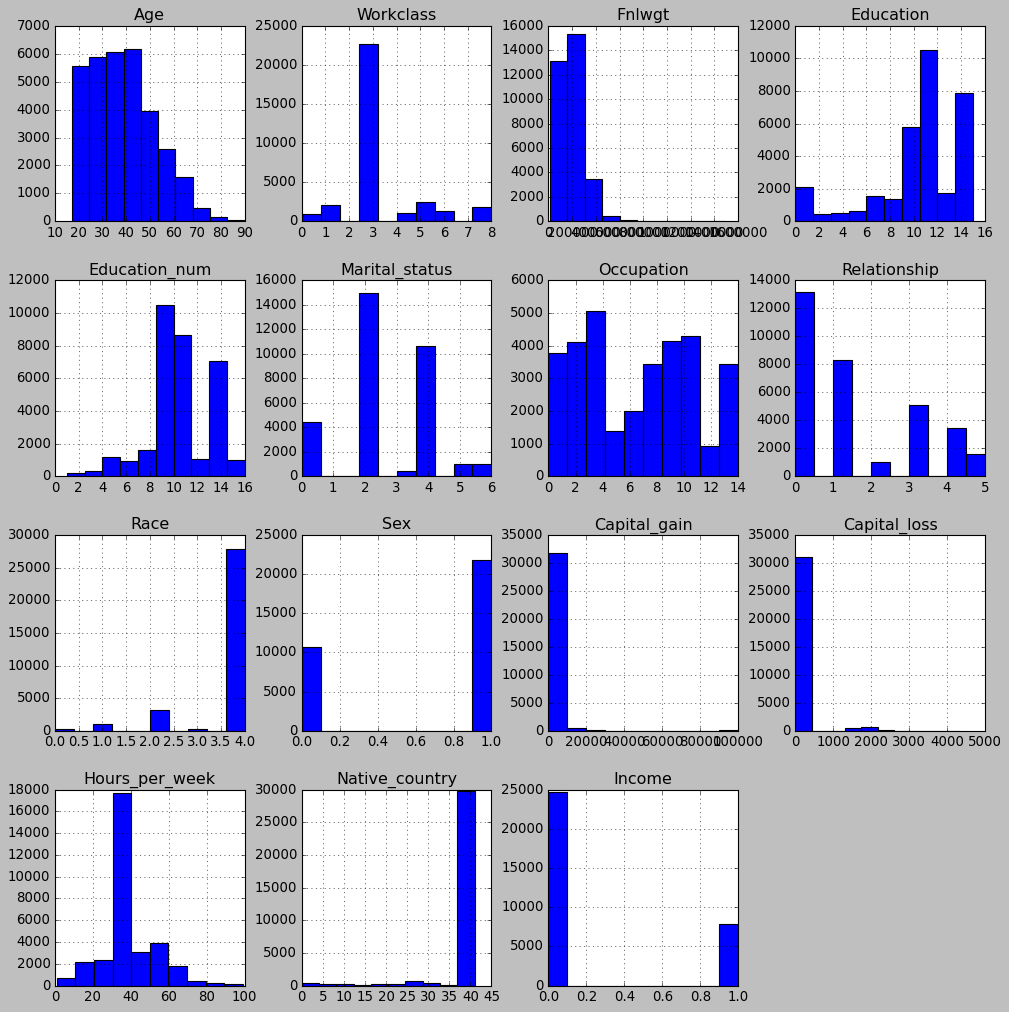

In [50]:
plt.style.use('classic')
df.hist(figsize=(15,15))
plt.show()

# CORRELATION USING A HEATMAP

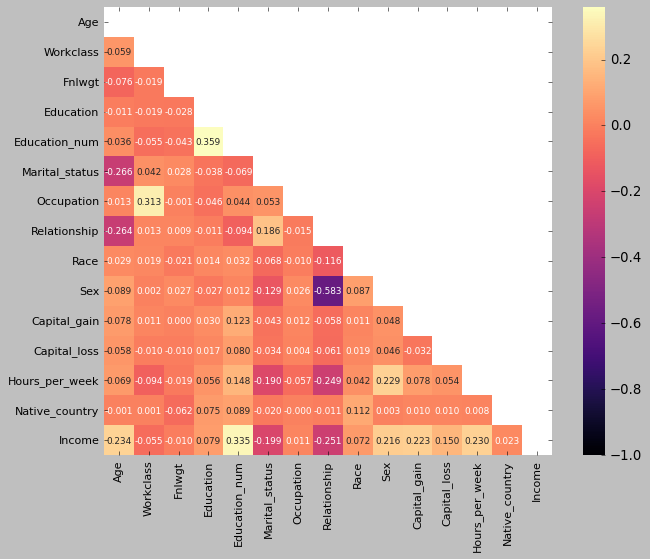

In [51]:
plt.style.use('seaborn-pastel')
upper_triangle=np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, annot=True, square=True, fmt='0.3f',annot_kws={'size':8}, cmap='magma', mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

There is no presence of multi colinearity issue between our columns.

# USING ZSCORE TO REMOVE OUTLIERS

In [53]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print("Shape of the dataframe before removing outliers is : ",df.shape)
print("Shape of the dataframe after removing outliers is : ",df1.shape)
print("The %AGE of data lost after removing outlier is : ",(df.shape[0]-df1.shape[0])/df.shape[0]*100)
df=df1.copy()

Shape of the dataframe before removing outliers is :  (32536, 15)
Shape of the dataframe after removing outliers is :  (27764, 15)
The %AGE of data lost after removing outlier is :  14.666830587656749


In [57]:
df.skew()

Age                0.484820
Workclass          1.182734
Fnlwgt             0.628891
Education         -0.955798
Education_num     -0.145662
Marital_status    -0.044911
Occupation         0.135419
Relationship       0.752707
Race              -2.587279
Sex               -0.688771
Capital_gain       4.929087
Capital_loss      29.511348
Hours_per_week    -0.358610
Native_country    -5.184195
Income             1.322852
dtype: float64

There are columns present in our dataset that are above acceptable range of+-0.5 value.

# USING LOG TRANSFORM TO FIX SKEWNESS

In [58]:
for col in int_dtype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

By using Log transformation on integer dtype columns to ensure that we do not have skewness in our dataset.

In [59]:
df.skew()

Age                0.484820
Workclass          1.182734
Fnlwgt            -0.956511
Education         -0.955798
Education_num     -0.145662
Marital_status    -0.044911
Occupation         0.135419
Relationship       0.752707
Race              -2.587279
Sex               -0.688771
Capital_gain       3.110221
Capital_loss      25.004422
Hours_per_week    -0.358610
Native_country    -5.184195
Income             1.322852
dtype: float64

# SPLITTING THE DATASET INTO 2 VARIABLES NAMELY X AND Y FOR FEATURE AND LABEL

In [60]:
X=df.drop('Income', axis=1)
Y=df['Income']

# RESOLVING THE CLASS IMBALANCE ISSUE IN LABEL COLUMN

In [61]:
Y.value_counts()

0    21540
1     6224
Name: Income, dtype: int64

In [62]:
#Adding samples to make all the categorical label values same
oversample=SMOTE()
X,Y=oversample.fit_resample(X,Y)

In [63]:
Y.value_counts()

0    21540
1    21540
Name: Income, dtype: int64

# FEATURE SCALING

In [64]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.776005,1.157135,-1.133142,-0.431226,1.015972,-0.316304,-0.798852,-0.728234,0.304719,0.606532,-0.383618,-0.032962,-2.649145,0.148797
1,-0.172924,-0.205364,0.528530,0.137532,-0.630187,-1.851712,-0.327600,-0.106195,0.304719,0.606532,-0.383618,-0.032962,-0.148768,0.148797
2,1.013238,-0.205364,0.676621,-2.706257,-1.453267,-0.316304,-0.327600,-0.728234,-3.520022,0.606532,-0.383618,-0.032962,-0.148768,0.148797
3,-0.252002,-0.205364,1.013172,0.421911,1.427512,-0.316304,-0.798852,2.381959,0.304719,-1.692609,-0.383618,-0.032962,-0.148768,0.148797
4,0.696928,-0.205364,0.009098,-1.284362,-2.276346,0.451400,0.143652,-0.106195,-3.520022,-1.692609,-0.383618,-0.032962,-2.371325,-6.863512


# FINDING BEST RANDOM STATE FOR BUILDING CLASSIFICATION MODELS

In [67]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred=lr.predict(X_test)
    accu_score=(accuracy_score(Y_test, pred))*100
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("The best accuracy score is", maxAccu, "at Random State", maxRS)

The best accuracy score is 77.8644382544104 at Random State 966


,Importance
Features,
Relationship,0.160
Marital_status,0.151
Age,0.145
Fnlwgt,0.121
Education_num,0.072
Occupation,0.070
Hours_per_week,0.066
Capital_gain,0.060
Education,0.048


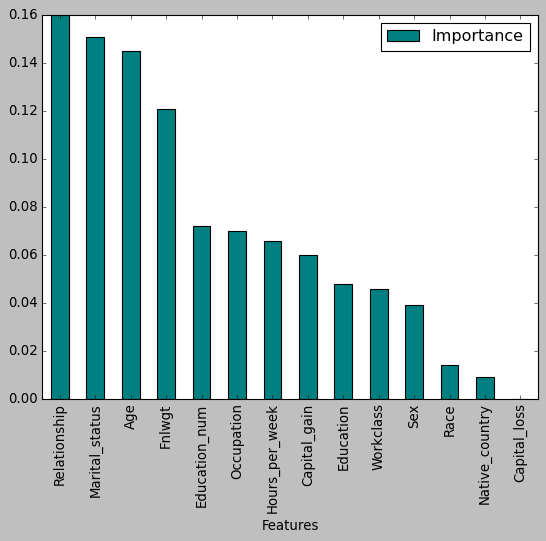

In [70]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importance=pd.DataFrame({'Features':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importance=importance.sort_values('Importance', ascending=False).set_index('Features')
importance.plot.bar(color='teal')
importance

# MACHINE LEARNING MODEL FOR CLASSIFICATION WITH EVALUATION METRICS

In [71]:
def classify(model, X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=53)
    
    model.fit(X_train, Y_train)
    pred=model.predict(X_test)
    
    accu_score=(accuracy_score(Y_test, pred))*100
    print("ACCURACY SCORE is= ", accu_score)
    
    class_report=classification_report(Y_test, pred)
    print("CLASSIFICATION REPORT is = ", class_report)
    
    cv_score=(cross_val_score(model, X,Y, cv=5).mean())*100
    print("Cross Validation Score is = ", cv_score)
    
    result=accu_score-cv_score
    print("Accuracy score - Cross validation score is= ", result)

In [72]:
#LOGISTIC REGRESSION MODEL
model=LogisticRegression()
classify(model,X,Y)

ACCURACY SCORE is=  76.66666666666667
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.78      0.76      0.77      5488
           1       0.75      0.78      0.77      5282

    accuracy                           0.77     10770
   macro avg       0.77      0.77      0.77     10770
weighted avg       0.77      0.77      0.77     10770

Cross Validation Score is =  76.65738161559888
Accuracy score - Cross validation score is=  0.009285051067791983


In [73]:
#SUPPORT VECTOR CLASSIFIER

model=SVC(C=1.0 ,random_state=966,kernel='rbf', gamma='auto')
classify(model, X, Y)

ACCURACY SCORE is=  84.11327762302693
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.90      0.77      0.83      5488
           1       0.80      0.91      0.85      5282

    accuracy                           0.84     10770
   macro avg       0.85      0.84      0.84     10770
weighted avg       0.85      0.84      0.84     10770

Cross Validation Score is =  84.12952646239556
Accuracy score - Cross validation score is=  -0.016248839368628865


In [74]:
#DECISION TREE CLASSIFIER

model=DecisionTreeClassifier(random_state=26, max_depth=15)
classify(model,X,Y)

ACCURACY SCORE is=  86.90807799442896
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.90      0.84      0.87      5488
           1       0.84      0.90      0.87      5282

    accuracy                           0.87     10770
   macro avg       0.87      0.87      0.87     10770
weighted avg       0.87      0.87      0.87     10770

Cross Validation Score is =  86.09099350046424
Accuracy score - Cross validation score is=  0.8170844939647282


In [75]:
#RANDOM FOREST CLASSIFIER
model=RandomForestClassifier(max_depth=15, random_state=200)
classify(model,X,Y)

ACCURACY SCORE is=  88.38440111420613
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.93      0.84      0.88      5488
           1       0.85      0.93      0.89      5282

    accuracy                           0.88     10770
   macro avg       0.89      0.88      0.88     10770
weighted avg       0.89      0.88      0.88     10770

Cross Validation Score is =  88.04781801299907
Accuracy score - Cross validation score is=  0.33658310120705437


In [76]:
#KNEIGHBORS CLASSIFIER

model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)

ACCURACY SCORE is=  83.55617455896007
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.89      0.77      0.83      5488
           1       0.79      0.90      0.84      5282

    accuracy                           0.84     10770
   macro avg       0.84      0.84      0.84     10770
weighted avg       0.84      0.84      0.84     10770

Cross Validation Score is =  83.85097493036211
Accuracy score - Cross validation score is=  -0.2948003714020473


In [77]:
#EXTRA TREES CLASSIFIER

model=ExtraTreesClassifier()
classify(model,X,Y)

ACCURACY SCORE is=  90.50139275766017
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.92      0.89      0.90      5488
           1       0.89      0.93      0.91      5282

    accuracy                           0.91     10770
   macro avg       0.91      0.91      0.91     10770
weighted avg       0.91      0.91      0.91     10770

Cross Validation Score is =  90.23444753946146
Accuracy score - Cross validation score is=  0.266945218198714


# HYPER PARAMETER TUNING ON THE BEST ML MODEL

In [78]:
fmod_params={'criterion':["gini","entropy"],
            'n_jobs':[-2,-1,1],
            'max_depth':[0,15,30],
            'random_state':[53,953,1000],
            'n_estimators':[100,200,300]}

In [80]:
GSCV=GridSearchCV(ExtraTreesClassifier(),fmod_params, cv=5)
GSCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [53, 953, 1000]})

In [81]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 53}

Here the Grid search Cv provided me with the best parameters out of all the combinations used to train the model.

In [82]:
Final_Model=ExtraTreesClassifier(criterion="gini", max_depth=30, n_estimators=2, n_jobs=230, random_state=53)
Classifier=Final_Model.fit(X_train, Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_acc=(accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the best model is= ", fmod_acc)

Accuracy score for the best model is=  85.23676880222841


# AUC ROC CURVE

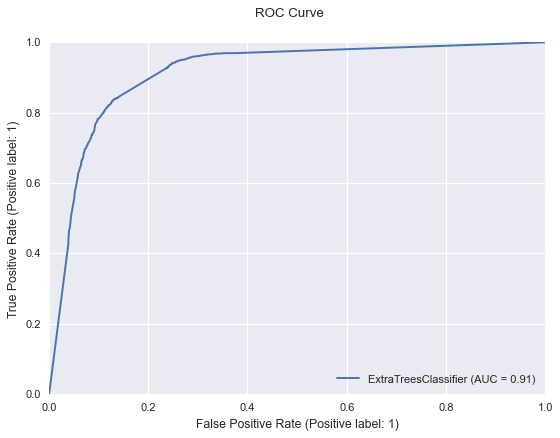

In [83]:
plt.style.use('seaborn')
display=metrics.plot_roc_curve(Final_Model, X_test, Y_test)
display.figure_.suptitle("ROC Curve")
plt.show()

# SAVING THE FINAL MODEL

In [85]:
filename="Final_Model.pkl"
joblib.dump(Final_Model, filename)

['Final_Model.pkl']

# >>>>>>>>DONE<<<<<<<<